In [7]:
!pip install easyocr
!pip install imutils


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutil

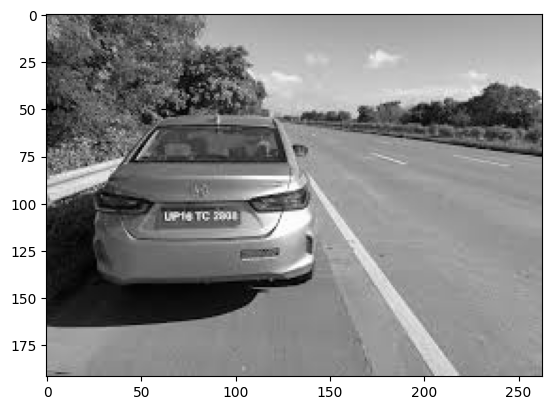

In [130]:
img=cv2.imread("image7.jpeg")

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

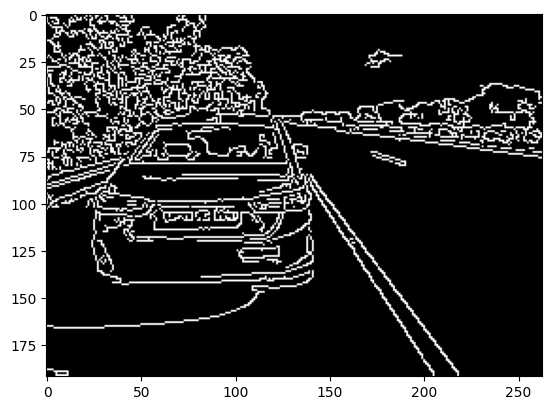

In [131]:
bfilter=cv2.bilateralFilter(gray,11,17,17) #filter
edged=cv2.Canny(bfilter,30,200) #edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [132]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea, reverse='True')[:10]


In [133]:
location= None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True);
    if len(approx)==4:
            location=approx;
            break

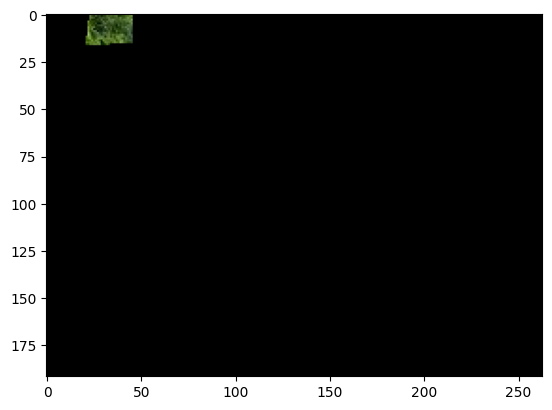

In [134]:
mask=np.zeros(gray.shape,np.uint8)
new_img=cv2.drawContours(mask, [location], 0,255,-1)
new_img=cv2.bitwise_and(img,img,mask=mask)
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

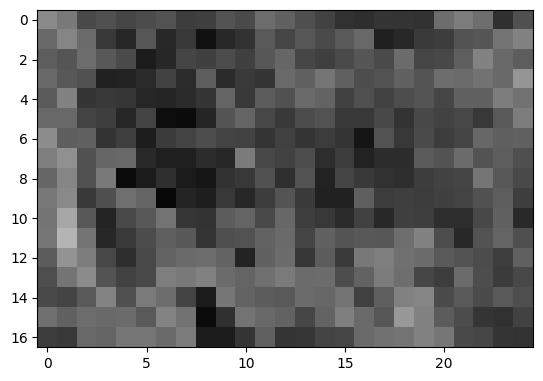

In [135]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped=gray[x1:x2+1,y1:y2+1]
plt.imshow(cv2.cvtColor(cropped,cv2.COLOR_BGR2RGB))

In [136]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[]

In [137]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

IndexError: list index out of range